In [1]:
import numpy as np
import scipy.stats as stats
import csv
import itertools
import pandas as pd
import csv
import itertools
import matplotlib.pyplot as plt

from collections import defaultdict
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler



## DATA

In [2]:
# dimensioonide vahel spearman!

f = 'limesurvey_loplikud_skoorid_koond.csv'


data = []
with open(f, 'r') as fid:
    csv_reader = csv.DictReader(fid, delimiter=',')
    fieldnames = csv_reader.fieldnames
    for line in csv_reader:
        data.append(line)

col_list1 = ['abs_avg1', 'info_avg1', 'aeg_avg1', 'afek_avg1', 'inter_avg1', 'inst_avg1', 'form_avg1', 'keer_avg1', 'subj_avg1', 'spont_avg1', 'imp_avg1', 'arg_avg1']
# col_list2 = ['abs_avg2', 'info_avg2', 'aeg_avg2', 'afek_avg2', 'inter_avg2', 'inst_avg2', 'form_avg2', 'keer_avg2', 'subj_avg2', 'spont_avg2', 'imp_avg2', 'arg_avg2']



# mis on vahet nt abs_avg1 ja abs_avg2 vahel?  et oli kaks gruppi hindajaid. nt ühelt grupilt tuleb keskmiseks 1.5, teiselt grupilt keskmiseks 1.4, siis
# keskmine tuleb 1.45. kui aga juhtub, et ühelt grupilt saab 1 ja teise grupi hinnangut ei tea üldse (st saab ##)
# siis DIM_avg1 korral tehakse (1 + ##)2 = 1
# ja DIM_avg2 korral saab automaatselt -1 (ehk ei tea midagi selle teksti kohta)
# ja kui mõlemad grupid annavad ## ja ##, siis mõlemad saavad keskmiseks ka -1
# valituks osutus: avg1 veerg

dim_df = pd.DataFrame(data).iloc[:, 1:].astype(float)
dim_ver1 = dim_df[col_list1]
dim_ver1.columns = [col_name.split('_')[0] for col_name in dim_ver1.columns]


dim_ver1 = dim_ver1.rename(columns={'aeg': 'temp', 'afek': 'aff', 'keer': 'comp'})

dim_ver1

,abs,info,temp,aff,inter,inst,form,comp,subj,spont,imp,arg
0,1.450000,1.666667,0.250000,0.800000,0.533333,1.250000,0.4,0.500000,1.300000,0.250,2.000,2.00
1,1.000000,2.000000,0.250000,1.375000,1.000000,1.041667,-1.0,0.600000,2.000000,0.125,0.500,1.00
2,1.500000,-1.000000,-1.000000,2.200000,1.166667,0.750000,0.0,-1.000000,2.333333,0.700,0.670,1.50
3,0.800000,-1.000000,1.000000,1.600000,0.300000,0.300000,0.4,0.000000,2.200000,0.225,1.400,2.00
4,1.250000,1.333333,-1.000000,1.000000,0.200000,0.250000,0.4,0.600000,1.050000,0.500,0.670,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.433333,-1.000000,2.100000,2.200000,1.700000,0.666667,0.2,0.166667,1.400000,-1.000,1.025,0.80
116,0.200000,1.333333,0.733333,1.916667,0.750000,0.000000,0.5,0.200000,2.100000,0.600,1.500,1.80
117,0.000000,2.875000,2.600000,1.083333,0.791667,1.000000,1.0,1.000000,0.250000,0.200,1.250,-1.00
118,0.500000,2.125000,-1.000000,0.200000,0.500000,2.875000,0.2,0.250000,-1.000000,-1.000,1.600,-1.00


## Correlations

In [3]:
# generate dimenions pair for calculating correlation

col_list = dim_ver1.columns
dim_pairs = [pair for pair in itertools.combinations(col_list, 2)]

# correlation calculations
corrs = []
for p in dim_pairs:
    arr1, arr2 = dim_ver1[p[0]], dim_ver1[p[1]]
    sp = stats.spearmanr(arr1, arr2)
    correlation = sp.correlation
    corrs.append([p, correlation])
corrs

[[('abs', 'info'), -0.20470010884642753],
 [('abs', 'temp'), -0.4134427080341693],
 [('abs', 'aff'), 0.24482107698876113],
 [('abs', 'inter'), 0.08708535974459003],
 [('abs', 'inst'), 0.12292276159812246],
 [('abs', 'form'), -0.17811049413995486],
 [('abs', 'comp'), 0.28796964087200383],
 [('abs', 'subj'), 0.24221871777608942],
 [('abs', 'spont'), 0.0817534004870394],
 [('abs', 'imp'), 0.028569086097418088],
 [('abs', 'arg'), 0.29238647274320684],
 [('info', 'temp'), 0.13749601479038553],
 [('info', 'aff'), -0.5693902662086606],
 [('info', 'inter'), -0.4488048140602797],
 [('info', 'inst'), 0.12702458189257185],
 [('info', 'form'), 0.6087401904703844],
 [('info', 'comp'), 0.41213799449270644],
 [('info', 'subj'), -0.5519354811900464],
 [('info', 'spont'), -0.4076285904630437],
 [('info', 'imp'), 0.6196128931668138],
 [('info', 'arg'), -0.12100072148381123],
 [('temp', 'aff'), 0.015897504229361203],
 [('temp', 'inter'), 0.015162502793957807],
 [('temp', 'inst'), -0.16042464892153285],
 

In [4]:
# constructing a dataframe
data = defaultdict(dict)
for dims, val in corrs:
    dim = defaultdict()
    a, b = dims[0], dims[1]
    data[a][b] = val
    data[b][a] = val
    data[a][a] = 1
    data[b][b] = 1

dim_corr_data = pd.DataFrame.from_dict(data, orient='index')
dim_corr_data

,info,abs,temp,aff,inter,inst,form,comp,subj,spont,imp,arg
abs,-0.204700,1.000000,-0.413443,0.244821,0.087085,0.122923,-0.178110,0.287970,0.242219,0.081753,0.028569,0.292386
info,1.000000,-0.204700,0.137496,-0.569390,-0.448805,0.127025,0.608740,0.412138,-0.551935,-0.407629,0.619613,-0.121001
temp,0.137496,-0.413443,1.000000,0.015898,0.015163,-0.160425,0.048003,-0.126500,-0.052617,-0.007420,-0.088959,-0.249939
aff,-0.569390,0.244821,0.015898,1.000000,0.644264,-0.113551,-0.650555,-0.148009,0.637460,0.541931,-0.635362,0.257899
inter,-0.448805,0.087085,0.015163,0.644264,1.000000,0.053375,-0.442551,-0.126302,0.431433,0.405644,-0.607368,0.275251
inst,0.127025,0.122923,-0.160425,-0.113551,0.053375,1.000000,0.054680,-0.001108,-0.148311,-0.069664,0.176272,0.185275
form,0.608740,-0.178110,0.048003,-0.650555,-0.442551,0.054680,1.000000,0.352986,-0.621939,-0.626795,0.613939,-0.103298
comp,0.412138,0.287970,-0.126500,-0.148009,-0.126302,-0.001108,0.352986,1.000000,-0.190075,-0.159975,0.356785,0.105021
subj,-0.551935,0.242219,-0.052617,0.637460,0.431433,-0.148311,-0.621939,-0.190075,1.000000,0.579183,-0.552875,0.360333
spont,-0.407629,0.081753,-0.007420,0.541931,0.405644,-0.069664,-0.626795,-0.159975,0.579183,1.000000,-0.458545,0.099936


In [5]:
dim_corr_data.to_csv('dim_corr.csv')

## preliminaries

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

"""
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate
at all using the observed correlation matrix against the identity matrix.
If the test found statistically insignificant, you should not employ a factor analysis.

"""

chi_square_value, p_value = calculate_bartlett_sphericity(dim_corr_data)
chi_square_value, p_value # p-value 4.364759855646919e-37

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

"""
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model. 
KMO estimates the proportion of variance among all the observed variable. 
Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
Value of KMO less than 0.6 is considered inadequate.
"""

kmo_all,kmo_model=calculate_kmo(dim_corr_data)
kmo_model 

In [ ]:
# #sklearn
# fa = FactorAnalysis(n_components = 3, rotation="varimax")
# fa.fit(X)
# uniqueness = pd.Series(fa.noise_variance_, index=dim_corr_data.columns)
# uniqueness.plot(
#     kind="bar",
#     ylabel="Uniqueness"
# )

# """
#  A high uniqueness for a variable indicates that the factors do not account well for its variance. 
# """


In [ ]:
# # sklearn
# # Communality
# communality = pd.Series(np.square(fa.components_.T).sum(axis=1), index=dim_corr_data.columns)
# communality.plot(
#     kind="bar",
#     ylabel="communality"
# )


# """
#  Opposing the uniquess, stands the communality (1-uniqueness)
# """


In [ ]:
# # FA scikit-learn

# X = StandardScaler().fit_transform(dim_corr_data)
# factors = 12
# fa = FactorAnalysis(n_components = factors, rotation="varimax") 

# fa


### FactorAnalayzer https://factor-analyzer.readthedocs.io/en/latest/


[7.53464075e+00 2.32763776e+00 9.67469443e-01 4.46748993e-01
 2.61848759e-01 2.01316633e-01 1.40179978e-01 4.25756940e-02
 3.35698415e-02 2.62524940e-02 1.77596513e-02 7.86333981e-17]


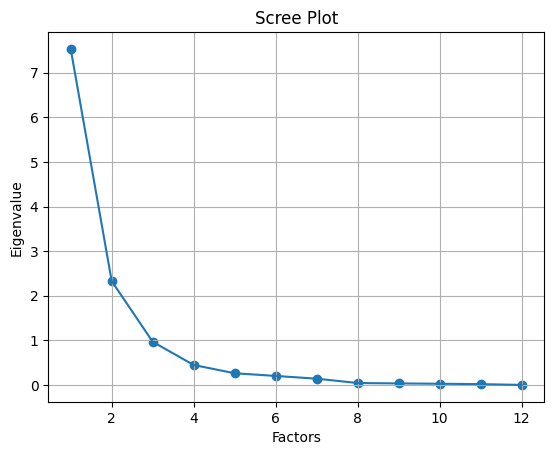

In [53]:
fa = FactorAnalyzer(12, rotation="varimax", method='ml')
fa.fit(dim_corr_data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)

# scree plot using matplotlib
plt.scatter(range(1,dim_corr_data.shape[1]+1), ev)
plt.plot(range(1,dim_corr_data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
# plt.show()
plt.savefig('f_screeplot.png')


In [ ]:
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(dim_corr_data)

In [ ]:
loadings = fa.loadings_
variance = fa.get_factor_variance()

[7.53464075e+00 2.32763776e+00 9.67469443e-01 4.46748993e-01
 2.61848759e-01 2.01316633e-01 1.40179978e-01 4.25756940e-02
 3.35698415e-02 2.62524940e-02 1.77596513e-02 7.86333981e-17]


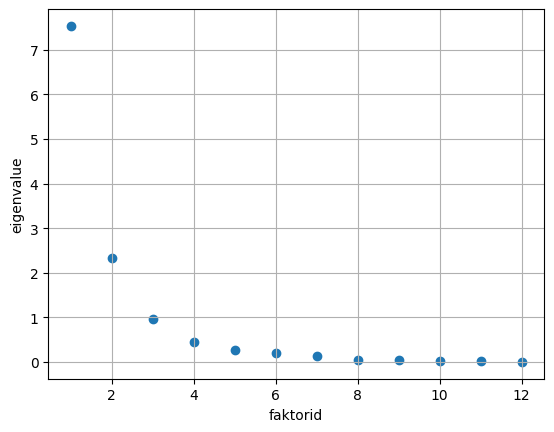

In [29]:
loadings = fa.loadings_
# print(loadings)

ev, v = fa.get_eigenvalues()
print(ev)
x_val = range(1, dim_corr_data.shape[1]+1)

plt.scatter(x_val, ev)
plt.xlabel('faktorid')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Communality
communality = pd.Series(np.square(fa.loadings_).sum(axis=1), index=dim_corr_data.columns)
print(communality)

communality.plot(
    kind="bar",
    ylabel="communality"
)

[-0.93802401 -0.26332891  0.10502776]
[ 0.18292418  0.85378391 -0.0615475 ]
[ 0.06120286 -0.93362323 -0.21894779]
[ 0.94036365  0.22071149 -0.21458697]
[ 0.9134868   0.15158771 -0.05617645]
[-0.20758928  0.19020436  0.78421018]
[-0.95260986 -0.19994011  0.11089984]
[-0.8048301   0.29186887 -0.20061388]
[ 0.91615304  0.27678198 -0.22170543]
[ 0.90068571  0.12552982 -0.18720838]
[-0.96753542 -0.04607129  0.16913073]
[0.41381359 0.59826403 0.12835687]
(array([6.99208596, 2.35538342, 0.90877169]), array([0.58267383, 0.19628195, 0.07573097]), array([0.58267383, 0.77895578, 0.85468676]))


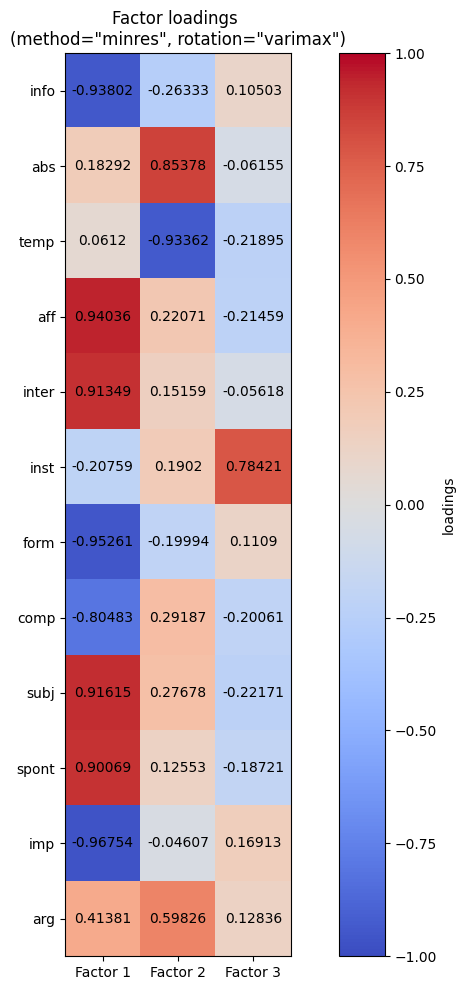

In [52]:
fa = FactorAnalyzer(3, rotation="varimax", method="minres")

fig, ax = plt.subplots(ncols=1, figsize=(10, 10), sharex=True, sharey=True)


fa = fa.fit(dim_corr_data)
factor_matrix = fa.loadings_
factor_variance = fa.get_factor_variance()
communalities = fa.get_communalities()

for loading in factor_matrix:
    print(loading)

print(factor_variance)


#  Plot the data as a heat map    
im = ax.imshow(factor_matrix, cmap="coolwarm", vmax=1, vmin=-1)
#  and add the corresponding value to the center of each cell
for (i,j), z in np.ndenumerate(factor_matrix):
    ax.text(j, i, str(z.round(5)), ha="center", va="center")
#  matplotlib <- metadata of the plot
ax.set_yticks(np.arange(len(dim_corr_data.columns)))
if ax.get_subplotspec().is_first_col():
    ax.set_yticklabels(dim_corr_data.columns)
else:
    ax.set_yticklabels([])
ax.set_title(f'Factor loadings \n(method="minres", rotation="varimax")')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["Factor 1", "Factor 2", "Factor 3"])
    
cb = fig.colorbar(im, ax=ax, location='right', label="loadings")
plt.tight_layout()
    
#  and add a colorbar


plt.savefig('plotted_FA-3f.png')
plt.show()


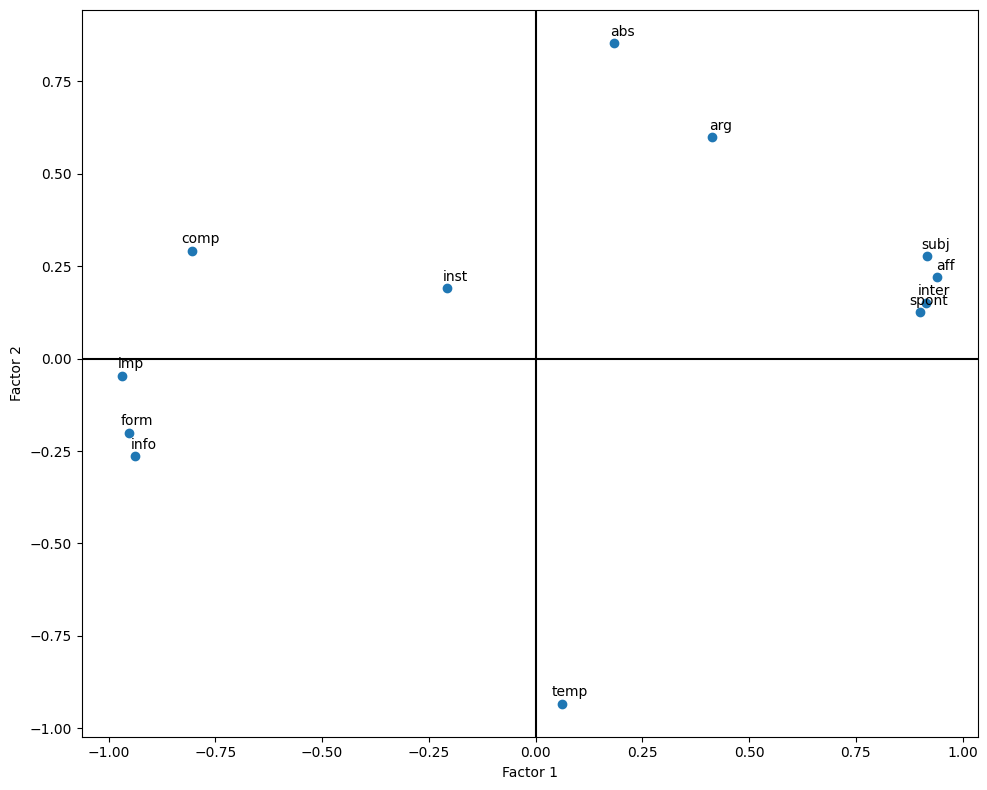

In [54]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
components = factor_matrix.T
vmax = np.abs(components).max()
ax.scatter(components[0,:], components[1, :])
ax.axhline(0, -1, 1, color='k')
ax.axvline(0, -1, 1, color='k')
for i,j, z in zip(components[0, :], components[1, :], dim_corr_data.columns):
    ax.text(i+.02, j+.02, str(z), ha="center")
# ax.set_title(str('Varimax'))
if ax.get_subplotspec().is_first_col():
    ax.set_ylabel("Factor 2")
ax.set_xlabel("Factor 1")

plt.tight_layout()
plt.savefig('2Dplot_FA_results.png')

plt.show()

